In [1]:
import pandas as pd
import numpy as np
import warnings
import copy
import seaborn as sns
import shap
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, TimeSeriesSplit, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                           roc_curve, precision_recall_curve, accuracy_score,
                           precision_score, recall_score, f1_score)
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
warnings.filterwarnings('ignore')

## **Code Block 6.1:**
**Credit Card Fraud Data Ingestion**


In [2]:
df = pd.read_csv('/content/card_transdata.csv')
print(df.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940                1          1   
1                        1.294219                1          0   
2                        0.427715                1          0   
3                        0.362663                1          1   
4                        2.222767                1          1   

   used_pin_number  online_order  fraud  
0                0             0      0  
1                0             0      0  
2                0             1      0  
3                0             1      0  
4                0             1      0  


## **Code Block 6.2:**
**Class Distribution: Fraudulent vs Non-Fraudulent Transactions**


Class Distribution (Counts):
fraud
0    912597
1     87403
Name: count, dtype: int64

Class Distribution (Percentages):
fraud
0    91.2597
1     8.7403
Name: proportion, dtype: float64


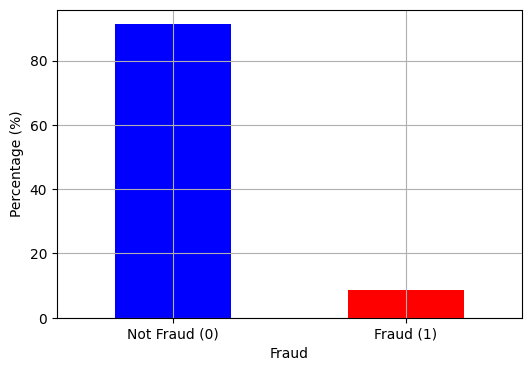

In [3]:
fraud_counts = df['fraud'].value_counts()
fruad_percentages = df['fraud'].value_counts(normalize=True) * 100

# Display the results
print("Class Distribution (Counts):")
print(fraud_counts)
print("\nClass Distribution (Percentages):")
print(fruad_percentages)

plt.figure(figsize=(6, 4))
fruad_percentages.plot(kind='bar', color=['blue', 'red'])
# plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.grid()
plt.show()

## **Code Block 6.3:**
**Complete pipeline from data preprocessing to model evaluation using Logistic Regression**


In [4]:
DF = df.copy()
DF.drop_duplicates(inplace=True)
X = DF.drop('fraud', axis=1)
y = DF['fraud']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)
print("Data split into training and testing sets successfully.")

print("Missing values in X_train:\n", X_train.isnull().sum())
print("\nMissing values in X_test:\n", X_test.isnull().sum())
print("\nMissing values in y_train:\n", y_train.isnull().sum())
print("\nMissing values in y_test:\n", y_test.isnull().sum())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Data split into training and testing sets successfully.
Missing values in X_train:
 distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
dtype: int64

Missing values in X_test:
 distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
dtype: int64

Missing values in y_train:
 0

Missing values in y_test:
 0
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98    273779
           1       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
w

## **Code Block 6.4:**
**Rebalance the training data using SMOTE and Train a Logistic Regression model on the rebalanced training data**






In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model_resampled = LogisticRegression(random_state=42, solver='liblinear')
model_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = model_resampled.predict(X_test)

print("Classification Report (Resampled Model):\n", classification_report(y_test, y_pred_resampled))
print("Confusion Matrix (Resampled Model):\n", confusion_matrix(y_test, y_pred_resampled))
print("ROC AUC Score (Resampled Model):", roc_auc_score(y_test, y_pred_resampled))

Classification Report (Resampled Model):
               precision    recall  f1-score   support

           0       0.99      0.93      0.96    273779
           1       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

Confusion Matrix (Resampled Model):
 [[255467  18312]
 [  1351  24870]]
ROC AUC Score (Resampled Model): 0.9407951734991477


## **Code Block 6.5:**
**Establishing Baseline Performance and Data Foundation**


In [ ]:
DF = df.copy()
DF.drop_duplicates(inplace=True)
X = DF.drop('fraud', axis=1)
y = DF['fraud']

print(f"Dataset shape: {DF.shape}")
print(f"Feature names: {list(X.columns)}")
print(f"Target distribution:\n{y.value_counts()}")
print(f"Fraud rate: {y.mean():.4f} ({y.mean()*100:.2f}%)")

# Check for missing values
print(f"\nMissing values:\n{X.isnull().sum().sum()} total missing values")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"Training set: {X_train.shape[0]:,} samples ({y_train.mean()*100:.2f}% fraud)")
print(f"Testing set:  {X_test.shape[0]:,} samples ({y_test.mean()*100:.2f}% fraud)")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

baseline_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)
y_pred_proba_baseline = baseline_model.predict_proba(X_test)[:, 1]

# Calculate baseline metrics
baseline_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_baseline),
    'precision': precision_score(y_test, y_pred_baseline, zero_division=0),
    'recall': recall_score(y_test, y_pred_baseline, zero_division=0),
    'f1': f1_score(y_test, y_pred_baseline, zero_division=0),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_baseline)}

print("\n" + "="*50)
print("BASELINE PERFORMANCE (NO RESAMPLING)")
print("="*50)
for metric, value in baseline_metrics.items():
    print(f"{metric.upper():>12}: {value:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))

Dataset shape: (1000000, 8)
Feature names: ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
Target distribution:
fraud
0    912597
1     87403
Name: count, dtype: int64
Fraud rate: 0.0874 (8.74%)

Missing values:
0 total missing values
Data split into training and testing sets successfully.
Training set: 700,000 samples (8.74% fraud)
Testing set:  300,000 samples (8.74% fraud)

BASELINE PERFORMANCE (NO RESAMPLING)
    ACCURACY: 0.9592
   PRECISION: 0.8958
      RECALL: 0.6033
          F1: 0.7210
     ROC_AUC: 0.9671

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    273779
           1       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



## **Code Block 6.6:**
**Implementing All Resampling Techniques**

In [ ]:
resampling_strategies = {
    'original': None,
    'random_oversample': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state = 42),
    'smote_tomek': SMOTETomek(random_state = 42),
    'smote_enn': SMOTEENN(random_state = 42),
    'adasyn': ADASYN(random_state = 42)}

print("\nResampling strategies:")
for name in resampling_strategies:
    print(f"  - {name}")

def create_gap_cv(X, n_splits = 5, gap_size = 0.1):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    splits = []

    for train_idx, test_idx in tscv.split(X):
        test_len = len(test_idx)
        gap = int(test_len * gap_size)

        if gap >= test_len:
            continue

        test_idx_gap = test_idx[gap:]

        splits.append((train_idx, test_idx_gap))

    return splits


validation_methods = {
    'stratified_kfold': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    'time_series_cv': TimeSeriesSplit(n_splits=5),
    'gap_cv': create_gap_cv(X_train, n_splits=5, gap_size=0.1)}

print("\nValidation methods:")
for name in validation_methods:
    print(f"  - {name}")

results = []

for val_name, validator in validation_methods.items():
    print(f"\n--- Validation: {val_name.upper()} ---")

    # Get splits
    if val_name == 'gap_cv':
        splits = validator
    else:
        splits = list(validator.split(X_train, y_train))

    for split_idx, (train_idx, val_idx) in enumerate(splits[:3]):

        X_train_split, X_val_split = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_split, y_val_split = y_train.iloc[train_idx], y_train.iloc[val_idx]

        for resample_name, resampler in resampling_strategies.items():
            try:
                if resampler is None:
                    X_resampled, y_resampled = X_train_split, y_train_split
                else:
                    X_resampled, y_resampled = resampler.fit_resample(
                        X_train_split, y_train_split)
            except Exception as e:
                print(f"✗ Resampling failed: {resample_name} - {e}")
                continue

            scaler_split = StandardScaler()
            X_resampled_scaled = scaler_split.fit_transform(X_resampled)
            X_val_scaled = scaler_split.transform(X_val_split)

            model = LogisticRegression(
                random_state = 42,
                solver = 'liblinear',
                max_iter = 1000)
            model.fit(X_resampled_scaled, y_resampled)

            # Predictions
            y_pred = model.predict(X_val_scaled)
            y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]

            # Metrics
            precision = precision_score(y_val_split, y_pred, zero_division=0)
            recall = recall_score(y_val_split, y_pred, zero_division=0)
            f1 = f1_score(y_val_split, y_pred, zero_division=0)
            roc_auc = roc_auc_score(y_val_split, y_pred_proba)

            results.append({
                'validation': val_name,
                'split': split_idx + 1,
                'resampling': resample_name,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'roc_auc': roc_auc,
                'train_samples': len(X_resampled),
                'val_samples': len(X_val_split),
                'train_fraud_rate': y_resampled.mean(),
                'val_fraud_rate': y_val_split.mean()})

            print(f"{val_name}-Split{split_idx+1} | {resample_name:18} | "
                  f"F1: {f1:.3f} | Recall: {recall:.3f}")


Resampling strategies:
  - original
  - random_oversample
  - smote
  - smote_tomek
  - smote_enn
  - adasyn

Validation methods:
  - stratified_kfold
  - time_series_cv
  - gap_cv

--- Validation: STRATIFIED_KFOLD ---
stratified_kfold-Split1 | original           | F1: 0.716 | Recall: 0.600
stratified_kfold-Split1 | random_oversample  | F1: 0.711 | Recall: 0.951
stratified_kfold-Split1 | smote              | F1: 0.710 | Recall: 0.951
stratified_kfold-Split1 | smote_tomek        | F1: 0.710 | Recall: 0.951
stratified_kfold-Split1 | smote_enn          | F1: 0.710 | Recall: 0.953
stratified_kfold-Split1 | adasyn             | F1: 0.685 | Recall: 0.973
stratified_kfold-Split2 | original           | F1: 0.720 | Recall: 0.601
stratified_kfold-Split2 | random_oversample  | F1: 0.718 | Recall: 0.950
stratified_kfold-Split2 | smote              | F1: 0.718 | Recall: 0.950
stratified_kfold-Split2 | smote_tomek        | F1: 0.718 | Recall: 0.950
stratified_kfold-Split2 | smote_enn          | F1:

## **Code Block 6.7:**
**Final Model Training with Best Resampling Strategy**

In [ ]:
results_df = pd.DataFrame(results)
best_resampling = results_df.groupby("resampling")["f1"].mean().idxmax()

print(f"\nBest resampling strategy: {best_resampling}")

if best_resampling != "original":
    best_resampler = resampling_strategies[best_resampling]
    X_train_res, y_train_res = best_resampler.fit_resample(X_train, y_train)
else:
    X_train_res, y_train_res = X_train, y_train

print(f"Training size after resampling: {len(X_train_res):,}")

scaler_final = StandardScaler()
X_train_final = scaler_final.fit_transform(X_train_res)
X_test_final = scaler_final.transform(X_test)

baseline_final_model = LogisticRegression(
    random_state = 42,
    solver = 'liblinear',
    max_iter = 1000).fit(X_train_final, y_train_res)

y_pred_final = baseline_final_model.predict(X_test_final)
y_pred_proba_baseline = baseline_final_model.predict_proba(X_test_final)[:, 1]

final_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_final),
    "precision": precision_score(y_test, y_pred_final, zero_division=0),
    "recall": recall_score(y_test, y_pred_final, zero_division=0),
    "f1": f1_score(y_test, y_pred_final, zero_division=0),
    "roc_auc": roc_auc_score(y_test, y_pred_proba_baseline),}

print("\n" + "="*60)
print("FINAL MODEL PERFORMANCE ON TEST SET")
print("="*60)
print(f"Best resampling strategy: {best_resampling}")
print(f"Train samples (after resampling): {len(X_train_res):,}")
print(f"Test samples: {len(X_test):,}\n")

for metric, score in final_metrics.items():
    print(f"{metric:10s}: {score:.4f}")


Best resampling strategy: smote_enn
Training size after resampling: 1,276,252

FINAL MODEL PERFORMANCE ON TEST SET
Best resampling strategy: smote_enn
Train samples (after resampling): 1,276,252
Test samples: 300,000

accuracy  : 0.9342
precision : 0.5749
recall    : 0.9499
f1        : 0.7163
roc_auc   : 0.9797


## **Code Block 6.8:**
**Performance Metrics**

In [ ]:
for metric, value in final_metrics.items():
    baseline_val = final_metrics[metric]
    improvement = value - baseline_val
    arrow = "↑" if improvement > 0 else "↓"
    print(f"{metric.upper():>12}: {value:.4f} (Baseline: {baseline_val:.4f}) {arrow} {improvement:+.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_final))

print(f"Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_final)
cm_df = pd.DataFrame(cm,
                    index = ['Actual Non-Fraud', 'Actual Fraud'],
                    columns = ['Predicted Non-Fraud', 'Predicted Fraud'])
print(cm_df)

    ACCURACY: 0.9342 (Baseline: 0.9342) ↓ +0.0000
   PRECISION: 0.5749 (Baseline: 0.5749) ↓ +0.0000
      RECALL: 0.9499 (Baseline: 0.9499) ↓ +0.0000
          F1: 0.7163 (Baseline: 0.7163) ↓ +0.0000
     ROC_AUC: 0.9797 (Baseline: 0.9797) ↓ +0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    273779
           1       0.57      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

Confusion Matrix:
                  Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud               255364            18415
Actual Fraud                     1314            24907


## **Code Block 6.9:**
**Threshold Optimization**

In [ ]:
precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, y_pred_proba_baseline)
f1_scores = 2 * (precision_curve * recall_curve) / (precision_curve + recall_curve)
f1_scores = np.nan_to_num(f1_scores)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"   F1-score at optimal threshold: {f1_scores[optimal_idx]:.3f}")

# Apply optimal threshold
y_pred_optimal = (y_pred_proba_baseline >= optimal_threshold).astype(int)
optimal_metrics = {
    'precision': precision_score(y_test, y_pred_optimal, zero_division=0),
    'recall': recall_score(y_test, y_pred_optimal, zero_division=0),
    'f1': f1_score(y_test, y_pred_optimal, zero_division=0)}

print(f"\nPerformance with optimal threshold ({optimal_threshold:.3f}):")
for metric, value in optimal_metrics.items():
    original_val = final_metrics[metric]
    improvement = value - original_val
    arrow = "↑" if improvement > 0 else "↓"
    print(f"{metric.upper():>12}: {value:.4f} (Original: {original_val:.4f}) {arrow} {improvement:+.4f}")

Optimal threshold: 0.762
   F1-score at optimal threshold: 0.784

Performance with optimal threshold (0.762):
   PRECISION: 0.7322 (Original: 0.5749) ↑ +0.1573
      RECALL: 0.8444 (Original: 0.9499) ↓ -0.1055
          F1: 0.7843 (Original: 0.7163) ↑ +0.0680


## **Code Block 6.10:**
**Dashboard Visualization**

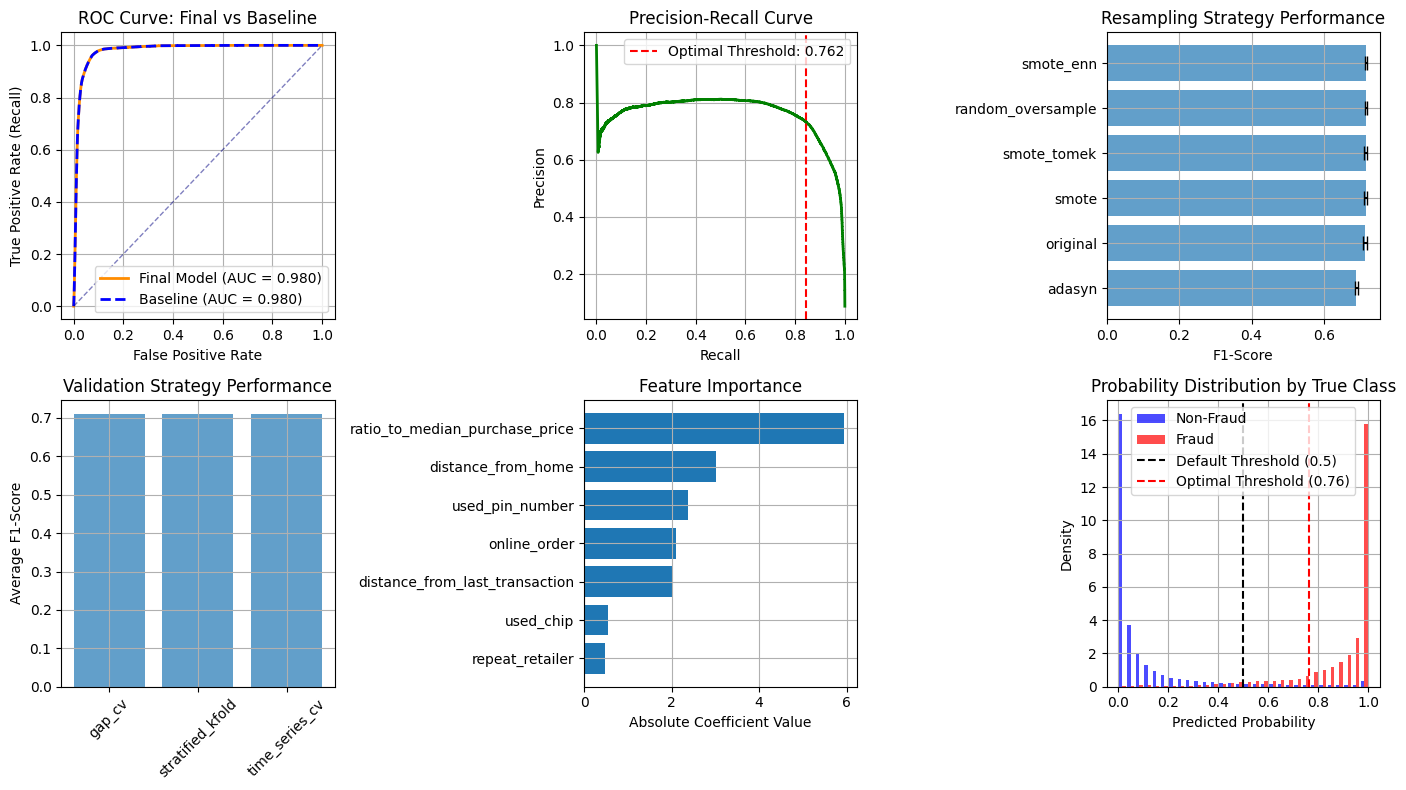

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_baseline)
axes[0,0].plot(fpr, tpr, color='darkorange', lw=2,
               label=f'Final Model (AUC = {final_metrics["roc_auc"]:.3f})')
fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_proba_baseline)
axes[0,0].plot(fpr_base, tpr_base, color='blue', lw=2, linestyle='--',
               label=f'Baseline (AUC = {final_metrics["roc_auc"]:.3f})')
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', alpha=0.5)
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate (Recall)')
axes[0,0].set_title('ROC Curve: Final vs Baseline')
axes[0,0].legend()
axes[0,0].grid()

# Precision-Recall Curve
axes[0,1].plot(recall_curve, precision_curve, color='green', lw=2)
axes[0,1].axvline(x=recall_curve[optimal_idx], color='red', linestyle='--',
                  label=f'Optimal Threshold: {optimal_threshold:.3f}')
axes[0,1].set_xlabel('Recall')
axes[0,1].set_ylabel('Precision')
axes[0,1].set_title('Precision-Recall Curve')
axes[0,1].legend()
axes[0,1].grid()

# Resampling Performance Comparison
resampling_performance = results_df.groupby('resampling')['f1'].agg(['mean', 'std']).round(3)
resampling_performance_sorted = resampling_performance.sort_values('mean', ascending=True)
axes[0,2].barh(range(len(resampling_performance_sorted)),
               resampling_performance_sorted['mean'],
               xerr=resampling_performance_sorted['std'],
               capsize=5, alpha=0.7)
axes[0,2].set_yticks(range(len(resampling_performance_sorted)))
axes[0,2].set_yticklabels(resampling_performance_sorted.index)
axes[0,2].set_xlabel('F1-Score')
axes[0,2].set_title('Resampling Strategy Performance')
axes[0,2].grid()

# Validation Strategy Comparison
validation_performance = results_df.groupby('validation')['f1'].mean()
axes[1,0].bar(validation_performance.index, validation_performance.values, alpha=0.7)
axes[1,0].set_ylabel('Average F1-Score')
axes[1,0].set_title('Validation Strategy Performance')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': baseline_final_model.coef_[0],
    'abs_importance': np.abs(baseline_final_model.coef_[0])}).sort_values('abs_importance', ascending=True)

axes[1,1].barh(feature_importance['feature'], feature_importance['abs_importance'])
axes[1,1].set_xlabel('Absolute Coefficient Value')
axes[1,1].set_title('Feature Importance')
axes[1,1].grid()

# Probability Distribution
axes[1,2].hist([y_pred_proba_baseline[y_test == 0], y_pred_proba_baseline[y_test == 1]],
               bins=30, alpha=0.7, label=['Non-Fraud', 'Fraud'],
               color=['blue', 'red'], density=True)
axes[1,2].axvline(x=0.5, color='black', linestyle='--', label='Default Threshold (0.5)')
axes[1,2].axvline(x=optimal_threshold, color='red', linestyle='--',
                  label=f'Optimal Threshold ({optimal_threshold:.2f})')
axes[1,2].set_xlabel('Predicted Probability')
axes[1,2].set_ylabel('Density')
axes[1,2].set_title('Probability Distribution by True Class')
axes[1,2].legend()
axes[1,2].grid()

plt.tight_layout()
plt.show()

## **Code Block 6.11:**
**Business Impact Analysis**

In [ ]:
cm_final = confusion_matrix(y_test, y_pred_final)
tn, fp, fn, tp = cm_final.ravel()
total_transactions = len(y_test)

print("\n" + "="*50)
print("BUSINESS IMPACT ASSESSMENT")
print("="*50)
print(f"Total transactions analyzed: {total_transactions:,}")
print(f"Actual fraud cases: {y_test.sum():,} ({y_test.mean()*100:.2f}%)")
print(f"\nModel Performance:")
print(f"Fraud Detection Rate (Recall): {tp/(tp+fn)*100:.1f}%")
print(f"False Positive Rate: {fp/(fp+tn)*100:.1f}%")
print(f"Precision: {tp/(tp+fp)*100:.1f}% of flagged transactions are actual fraud")

print(f"\nFinancial Impact:")
print(f"Missed Fraud (False Negatives): {fn} transactions → Potential losses")
print(f"False Alarms (False Positives): {fp} transactions → Investigation costs")
print(f"Correctly Flagged Fraud: {tp} transactions → Losses prevented")

print(f"\nRecommendations:")
if final_metrics['recall'] < 0.7:
    print("Consider lowering threshold to catch more fraud (increases false alarms)")
else:
    print("Good fraud detection rate maintained")

if final_metrics['precision'] < 0.3:
    print("High false alarm rate - consider raising threshold")
else:
    print("Reasonable precision maintained")

print(f"Best configuration: {best_resampling} + Optimal Threshold ({optimal_threshold:.3f})")
print(f"Final F1-score: {final_metrics['f1']:.3f}, Recall: {final_metrics['recall']:.3f}")


BUSINESS IMPACT ASSESSMENT
Total transactions analyzed: 300,000
Actual fraud cases: 26,221 (8.74%)

Model Performance:
Fraud Detection Rate (Recall): 95.0%
False Positive Rate: 6.7%
Precision: 57.5% of flagged transactions are actual fraud

Financial Impact:
Missed Fraud (False Negatives): 1314 transactions → Potential losses
False Alarms (False Positives): 18415 transactions → Investigation costs
Correctly Flagged Fraud: 24907 transactions → Losses prevented

Recommendations:
Good fraud detection rate maintained
Reasonable precision maintained
Best configuration: smote_enn + Optimal Threshold (0.762)
Final F1-score: 0.716, Recall: 0.950


## **Code Block 6.12:**
**Comprehensive Multi-Stage Framework: Multi-Algorithm Evaluation with Advanced Resampling and Temporal Validation**


In [5]:
validation_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

resampling_strategies = {
    "original": None,
    "random_oversample": RandomOverSampler(random_state=42),
    "smote": SMOTE(random_state=42),
    "smote_tomek": SMOTETomek(random_state=42),
    "smote_enn": SMOTEENN(random_state=42),
    "adasyn": ADASYN(random_state=42)}

algorithms = {
    "logistic_regression": LogisticRegression(random_state=42, max_iter=1000),
    "decision_tree": DecisionTreeClassifier(random_state=42),
    "random_forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "xgboost": XGBClassifier(random_state=42, eval_metric="logloss", use_label_encoder=False),
    "lightgbm": LGBMClassifier(random_state=42, verbose=-1)}

DF = df.copy()
DF.drop_duplicates(inplace=True)

X = DF.drop("fraud", axis=1)
y = DF["fraud"]

def evaluate_model_with_threshold(model, X_train, X_test, y_train, y_test):

    if isinstance(model, LogisticRegression):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]

    precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * precision_curve[:-1] * recall_curve[:-1] / (precision_curve[:-1] + recall_curve[:-1])
    f1_scores = np.nan_to_num(f1_scores)

    opt_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[opt_idx]

    y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

    return {
        "precision_optimal": precision_score(y_test, y_pred_optimal, zero_division=0),
        "recall_optimal": recall_score(y_test, y_pred_optimal, zero_division=0),
        "f1_optimal": f1_score(y_test, y_pred_optimal, zero_division=0),
        "roc_auc": roc_auc_score(y_test, y_proba),
        "optimal_threshold": optimal_threshold,
        "y_pred_proba": y_proba}

results = []
detailed_predictions = {}

splits = list(validation_method.split(X, y))

for fold_idx, (train_idx, test_idx) in enumerate(splits[:3]):
    print(f"\n=== FOLD {fold_idx + 1} ===")

    X_train = X.iloc[train_idx]
    X_test  = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test  = y.iloc[test_idx]

    for resample_name, resampler in resampling_strategies.items():

        try:
            if resampler is None:
                X_res, y_res = X_train, y_train
            else:
                X_res, y_res = resampler.fit_resample(X_train, y_train)
        except Exception as e:
            print(f"  Resampling failed ({resample_name}): {e}")
            continue

        for algo_name, algo in algorithms.items():
            model = copy.deepcopy(algo)

            try:
                metrics = evaluate_model_with_threshold(
                    model, X_res, X_test, y_res, y_test)

                results.append({
                    "validation": "stratified_kfold",
                    "fold": fold_idx + 1,
                    "resampling": resample_name,
                    "algorithm": algo_name,
                    **metrics,
                    "train_samples": len(X_res),
                    "test_samples": len(X_test)})

                key = f"{resample_name}_{algo_name}"
                detailed_predictions.setdefault(key, []).append({
                    "y_true": y_test.values,
                    "y_pred_proba": metrics["y_pred_proba"],
                    "optimal_threshold": metrics["optimal_threshold"]})

                print(f"  {resample_name:15} | {algo_name:20} | F1={metrics['f1_optimal']:.3f}")

            except Exception as e:
                print(f"  Error in {algo_name}: {e}")

results_df = pd.DataFrame(results)

summary_optimal = results_df.groupby(
    ["validation", "resampling", "algorithm"]).agg({
    "precision_optimal": ["mean", "std"],
    "recall_optimal": ["mean", "std"],
    "f1_optimal": ["mean", "std"],
    "roc_auc": ["mean", "std"],
    "optimal_threshold": "mean"}).round(3)

print("\n=== PERFORMANCE SUMMARY (OPTIMAL THRESHOLD) ===")
print(summary_optimal)

best_configs = {}

for metric in ["f1_optimal", "recall_optimal", "precision_optimal", "roc_auc"]:
    grp = results_df.groupby(["validation", "resampling", "algorithm"])[metric].mean()
    best_idx = grp.idxmax()

    best_configs[metric] = {
        "configuration": best_idx,
        "score": grp.max(),
        "details": results_df[
            (results_df["validation"] == best_idx[0]) &
            (results_df["resampling"] == best_idx[1]) &
            (results_df["algorithm"] == best_idx[2])].iloc[0]}

print("\n=== BEST CONFIGURATIONS BY METRIC ===")
for metric, info in best_configs.items():
    print(f"{metric.upper():>15}: {info['configuration']} | Score={info['score']:.3f} | Thr={info['details']['optimal_threshold']:.3f}")



=== FOLD 1 ===
  original        | logistic_regression  | F1=0.798
  original        | decision_tree        | F1=1.000
  original        | random_forest        | F1=1.000
  original        | xgboost              | F1=0.992
  original        | lightgbm             | F1=0.993
  random_oversample | logistic_regression  | F1=0.786
  random_oversample | decision_tree        | F1=1.000
  random_oversample | random_forest        | F1=1.000
  random_oversample | xgboost              | F1=0.996
  random_oversample | lightgbm             | F1=0.995
  smote           | logistic_regression  | F1=0.789
  smote           | decision_tree        | F1=0.995
  smote           | random_forest        | F1=0.999
  smote           | xgboost              | F1=0.993
  smote           | lightgbm             | F1=0.997
  smote_tomek     | logistic_regression  | F1=0.788
  smote_tomek     | decision_tree        | F1=0.995
  smote_tomek     | random_forest        | F1=0.999
  smote_tomek     | xgboost           

## **Code Block 6.13:**
**Rank all models by F1 at Optimal Threshold**


In [14]:
ranking_table = (
    results_df
    .groupby(["algorithm", "resampling"])["f1_optimal"]
    .mean()
    .reset_index()
    .sort_values("f1_optimal", ascending=False))

ranking_table.reset_index(drop=True, inplace=True)

print("\n=== MODEL RANKING (BY F1 @ OPTIMAL THRESHOLD) ===")
display(ranking_table)


=== MODEL RANKING (BY F1 @ OPTIMAL THRESHOLD) ===


,algorithm,resampling,f1_optimal
0,random_forest,original,0.999990
1,random_forest,random_oversample,0.999981
2,decision_tree,random_oversample,0.999952
3,decision_tree,original,0.999933
4,random_forest,smote,0.999132
5,random_forest,smote_tomek,0.999046
6,random_forest,adasyn,0.997492
7,xgboost,adasyn,0.996759
8,random_forest,smote_enn,0.996675
9,lightgbm,adasyn,0.996223


## **Code Block 6.14:**
**Aggregate metrics by algorithm and resampling**


In [15]:
ranking_df = results_df.groupby(["algorithm", "resampling"]).agg({
    "f1_optimal": "mean",
    "precision_optimal": "mean",
    "recall_optimal": "mean",
    "roc_auc": "mean",
    "optimal_threshold": "mean"}).round(4)

ranking_df = ranking_df.sort_values(by="f1_optimal", ascending=False)
ranking_df.reset_index(inplace=True)
print("=== FULL MODEL RANKING ===")
display(ranking_df)


=== FULL MODEL RANKING ===


,algorithm,resampling,f1_optimal,precision_optimal,recall_optimal,roc_auc,optimal_threshold
0,decision_tree,random_oversample,1.0000,1.0000,0.9999,1.0000,1.0000
1,random_forest,random_oversample,1.0000,1.0000,1.0000,1.0000,0.5133
2,random_forest,original,1.0000,1.0000,1.0000,1.0000,0.4933
3,decision_tree,original,0.9999,0.9999,0.9999,1.0000,1.0000
4,random_forest,smote,0.9991,0.9991,0.9991,1.0000,0.8667
5,random_forest,smote_tomek,0.9990,0.9992,0.9989,1.0000,0.8800
6,random_forest,adasyn,0.9975,0.9975,0.9975,1.0000,0.9167
7,xgboost,adasyn,0.9968,0.9993,0.9942,1.0000,0.9827
8,random_forest,smote_enn,0.9967,0.9958,0.9975,1.0000,0.9467
9,lightgbm,adasyn,0.9962,0.9987,0.9938,1.0000,0.9690


## **Code Block 6.15:**
**Feature Importance Analysis with Random Forest**


In [17]:
rf = RandomForestClassifier(random_state=42).fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances_df = feature_importances.reset_index()
feature_importances_df.columns = ['feature', 'feature importance scores']
display(feature_importances_df)

,feature,feature importance scores
0,ratio_to_median_purchase_price,0.526622
1,online_order,0.161702
2,distance_from_home,0.137249
3,used_pin_number,0.067089
4,used_chip,0.055161
5,distance_from_last_transaction,0.046034
6,repeat_retailer,0.006143
